<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:The Input Layer is what receives input from our dataset. Sometimes it is called the visible layer because it's the only part that is exposed to our data and that our data interacts with directly. Typically node maps are drawn with one input node for each of the different inputs/features/columns of our dataset that will be passed to the network. 
### Hidden Layer:Layers after the input layer are called Hidden Layers. This is because they cannot be accessed except through the input layer. They're inside of the network and they perform their functions, but we don't directly interact with them. The simplest possible network is to have a single neuron in the hidden layer that just outputs the value. "Deep Learning" apart from being a big buzzword simply means that we are using a Neural Network that has multiple hidden layers.
### Output Layer:The final layer is called the Output Layer. The purpose of the output layer is to output a vector of values that is in a format that is suitable for the type of problem that we're trying to address. Typically the output value is modified by an "activation function" to transform it into a format that makes sense for our context, here's a couple of examples:
### Neuron:receive inputs and pass on their signal to the next layer of nodes if a certain threshold is reached
### Weight:modiefies the input
### Activation Function:In Neural Networks, each node has an activation function. Each node in a given layer typically has the same activation function. These activation functions are the biggest piece of neural networks that have been inspired by actual biology. The activation function decides whether a cell "fires" or not. Sometimes it is said that the cell is "activated" or not. In Artificial Neural Networks activation functions decide how much signal to pass onto the next layer. This is why they are sometimes referred to as transfer functions because they determine how much signal is transferred to the next layer.
### Node Map:  a visual diagram of the architecture or "topology" of our neural network. It's kind of like a flow chart in that it shows the path from inputs to outputs. They are usually color coded and help us understand at a very high level, some of the differences in architecture between kinds of neural networks.
![A Mapping](http://jalammar.github.io/images/NNs_formula_no_bias.png)
![Neural Network Zoo](http://www.asimovinstitute.org/wp-content/uploads/2016/09/neuralnetworks.png)
### Perceptron:A perceptron is just a single node or neuron of a neural network with nothing else. It can take any number of inputs and spit out an output.


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

## Write your own perceptron code that can correctly classify a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [1]:
import numpy as np

np.random.seed(812)

inputs = np.array([
    [0,0,1],
    [1,0,1],
    [0,1,1],
    [1,1,0]
])

correct_outputs= [[0],[1],[0],[1]]

In [3]:
def nand_percept(x1, x2):
    return (x1 and x2)

## Implement your own Perceptron Class and use it to classify a binary dataset like: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 
- [Titanic](https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv)
- [A two-class version of the Iris dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv)

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [4]:
#import numpy as np
class Perceptron(object):
  def __init__(self, rate = 0.01, niter = 10):
    self.rate = rate
    self.niter = niter

  def fit(self, X, y):
    """Fit training data
    X : Training vectors, X.shape : [#samples, #features]
    y : Target values, y.shape : [#samples]
    """

    # weights
    self.weight = np.zeros(1 + X.shape[1])

    # Number of misclassifications
    self.errors = []  # Number of misclassifications

    for i in range(self.niter):
      err = 0
      for xi, target in zip(X, y):
        delta_w = self.rate * (target - self.predict(xi))
        self.weight[1:] += delta_w * xi
        self.weight[0] += delta_w
        err += int(delta_w != 0.0)
      self.errors.append(err)
    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.weight[1:]) + self.weight[0]

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)

In [5]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv')
df.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
X = df[['pclass', 'sex', 'fare', 'sibsp', 'parch', 'age']].replace({'male': 0, 'female': 1}).values
y = np.array(df['survived'].replace({0:-1}))

In [8]:
percept = Perceptron(0.01, 50)
percept.fit(X, y)

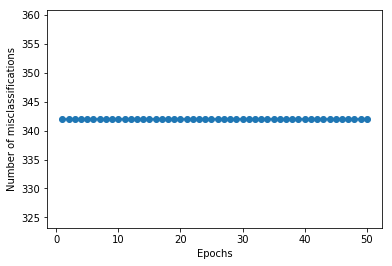

In [9]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(percept.errors) + 1), percept.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?